# **Dinâmica de um pêndulo forçado amortecido**

**Autor**: Carlos Eduardo Gonçalves de Oliveira, 201803300

**Disciplina**: Física Computacional I

### **Contextualização**

No presente trabalho, será tratada a simulação de um experimento físico análogo à oscilação de um pêndulo. As hipóteses que regem a simulação são:

**(1)** - A massa do pêndulo está concentrada tão somente no elemento oscilante;

**(2)** - A haste (ou corda) do pêndulo é inextensível, inflexível e não possui massa;

**(3)** - O movimento do pêndulo é restrito a um plano;

**(4)** - Há uma força de resistência proporcional à velocidade da massa que oscila;

**(5)** - Há uma força motriz de natureza periódica que impulsiona o elemento oscilante;

### **Objetivos**

- Resolver as equações diferenciais que descrevem a situação física discutida considerando diferentes valores para as condições iniciais (por exemplo, diferentes velocidades e posições iniciais);

- Identificar um padrão caótico no gráfico de $\theta$ por $\omega$ (que é $\frac{d\theta}{dt}$, onde t representa o tempo);

### **Equações diferenciais que caracterizam o sistema**

Haja vista que a haste do pêndulo é inextensível e inflexível, a única direção de movimento do elemento oscilante é a direção tangencial, de modo que:


<p align="center">$ma_t = f_g + f_m + f_r$&emsp;(1)</p>

- $a_t$ é a aceleração tangencial da massa que oscila,

- $f_g$ é a força gravitacional sobre a massa,

- $f_m$ é a força motriz de natureza periódica sobre a massa,

- $f_r$ é a força de resistência ao movimento da massa.

Caracterizando cada uma dessas grandezas em coordenadas polares (supondo que o comprimento da haste do pêndulo seja $l$), tem-se:

- $a_t = l\frac{d^2\theta}{dt^2}$

- $f_g = -mg\sin{\theta}$

- $f_r = -\kappa v_t = -\kappa (l\frac{d\theta}{dt})$

- $f_m = f_0 \cos{\omega_0t}$

Substituindo essas expressões em (1) e simplificando, chegamos em:

<p align="center">$\frac{d^2\theta}{dt^2} = -\frac{\kappa}{m}\frac{d\theta}{dt} - \frac{g}{l}\sin{\theta} + \frac{f_0}{ml}\cos{\omega_0t}$&emsp;(2)</p>

Como tenho a pretensão de resolver essa equação diferencial usando o **método de Euler**, preciso ajustá-la de modo que não haja derivada segunda. Uma mudança de perspectiva que podemos realizar é:

<p align="center">$\frac{d\theta}{dt} = \phi$&emsp;(3)</p>
<p align="center">$\frac{d\phi}{dt} = -\frac{\kappa}{m}\phi - \frac{g}{l}\sin{\theta} + \frac{f_0}{ml}\cos{\omega_0t}$&emsp;(4)</p>

Agora temos duas equações diferenciais de primeira ordem acopladas, que podem ser resolvidas facilmente pelo método de Euler. Em particular, se quisermos usar, além da aproximação pela primeira derivada, também a derivada segunda, basta derivarmos as equações (3) e (4):

<p align="center">$\frac{d^2\theta}{dt^2} = \frac{d\phi}{dt}$&emsp;(5)</p>
<p align="center">$\frac{d^2\phi}{dt^2} = -\frac{\kappa}{m}\frac{d\phi}{dt} - \frac{g}{l}\phi\cos{\theta} - \frac{f_0w_0}{ml}\sin{\omega_0t}$&emsp;(6)</p>

### **Método de Euler**

Conforme já foi dito, será usado o método de Euler para a resolução de (3) e (4).

O método de Euler é diretamente análogo a uma série de Taylor, porém com truncamento em alguma das derivadas. Para uma primeira aproximação, a primeira derivada (juntamente com uma discretização $h$ para $t$), podemos fazer:

<p align="center">$\theta_{n+1} = \theta_n + h\frac{d\theta}{dt} + O(h^2)$&emsp;(7)</p>
<p align="center">$\phi_{n+1} = \phi_n + h\frac{d\phi}{dt} + O(h^2)$&emsp;(8)</p>

- $\theta_{i} = \theta(t_{i})$

- $\phi_{i} = \phi(t_{i})$

- $t_{i+1} - t_i = h$

Note que nesse caso o erro de truncamento é da ordem de $O(h^2)$. Caso façamos uma aproximação até a segunda derivada, temos:

<p align="center">$\theta_{n+1} = \theta_n + h\frac{d\theta}{dt} + \frac{h^2}{2}\frac{d^2\theta}{dt^2} + O(h^3)$&emsp;(9)</p>
<p align="center">$\phi_{n+1} = \phi_n + h\frac{\phi}{dt} + \frac{h^2}{2}\frac{d^2\phi}{dt^2} + O(h^3)$&emsp;(10)</p>

, o que, por sua vez, nos dá um erro de truncamento da ordem de $O(h^3)$. Os dois métodos serão testados logo abaixo.

### **Comparando o método de Euler para a primeira e segunda derivada**

Primeiro, serão definidos alguns valores que serão importantes na simulação da situação física.

- A massa do elemento oscilante será 500g;

- A aceleração da gravidade será 9.80665$\frac{m}{s^2}$;

- O comprimento da haste do pêndulo será 30cm;

- E a constante de proporcionalidade da força de resistência será 0.3$\frac{Ns}{m}$;

In [1]:
# massa do elemento oscilante
m = 0.5 #kg

# aceleração da gravidade
g =  9.80665 #m/s^2

# comprimento da haste do pêndulo
l = 0.3 #m

# constante da força de resistência
k = 0.3 #Ns/m

Logo abaixo serão criadas algumas funções que terão utilidade na implementação do método de Euler pela primeira e segunda derivada:

In [2]:
import numpy as np

####################### definindo equação (3)
def eq3(phi):
    dthetadt = phi
    return dthetadt

####################### definindo equação (4)
def eq4(theta, phi, t, f0, w0):
    dphidt = -k/m*phi - g/l*np.sin(theta) + f0/(m*l)*np.cos(w0*t)
    return dphidt

#######################  definindo equação (5)
def eq5(dphidt):
    d2thetadt2 = dphidt
    return d2thetadt2

####################### definindo equação (6)
def eq6(theta, phi, dphidt, t, f0, w0):
    d2phidt2 = -k/m*dphidt - g/l*np.cos(theta)*phi - f0*w0/(m*l)*np.sin(w0*t)
    return d2phidt2

####################### definindo método de Euler para a primeira derivada
def Euler1(theta0, v0, deltat, h, f0, w0):
    '''
    *** Método de Euler até a primeira derivada
    *** Parâmetros:
    theta0 = valor inicial para o ângulo theta, medido a partir do eixo vertical, em graus (entre -180° e 180°)
    v0 = valor inicial da velocidade da massa oscilante, em m/s
    deltat = intervalo de tempo total da simulação, em segundos
    h = discretização para o tempo, em segundos
    f0 = amplitude da força motriz oscilatória, em Newtons
    w0 = frequência da força motriz oscilatória, em Hertz
    *** Retorna:
    thetas = array da solução encontrada para theta, em radianos
    phis = array da solução encontrada para phi, em radianos por segundo
    '''

    # convertendo theta0 em radianos
    theta0 = theta0*np.pi/180

    # encontrando valor de phi inicial
    phi0 = v0/l

    # definindo espaço linear para o tempo, de 0 a deltat em degraus de h
    ts = np.arange(0, deltat + h, h)

    # inicializando solução para theta
    thetas = np.zeros(len(ts))
    thetas[0] = theta0

    # inicializando solução para phi
    phis = np.zeros(len(ts))
    phis[0] = phi0

    # solucionando as equações diferenciais
    for n in range(1, len(ts)):
        # calculando derivadas
        dthetadt = eq3(phis[n-1])
        dphidt = eq4(thetas[n-1], phis[n-1], ts[n-1], f0, w0)

        # calculando próximo theta e próximo phi
        thetas[n] = thetas[n-1] + h*dthetadt
        phis[n] = phis[n-1] + h*dphidt

        # ajustando valor de theta entre -pi e pi
        if thetas[n] > np.pi:
            thetas[n] -= 2*np.pi
        elif thetas[n] < -np.pi:
            thetas[n] += 2*np.pi

    return thetas, phis

####################### definindo método de Euler para a segunda derivada
def Euler2(theta0, v0, deltat, h, f0, w0):
    '''
    *** Método de Euler até a segunda derivada
    *** Parâmetros:
    theta0 = valor inicial para o ângulo theta, medido a partir do eixo vertical, em graus (entre -180° e 180°)
    v0 = valor inicial da velocidade da massa oscilante, em m/s
    deltat = intervalo de tempo total da simulação, em segundos
    h = discretização para o tempo, em segundos
    f0 = amplitude da força motriz oscilatória, em Newtons
    w0 = frequência da força motriz oscilatória, em Hertz
    *** Retorna:
    thetas = array da solução encontrada para theta, em radianos
    phis = array da solução encontrada para phi, em radianos por segundo
    '''

    # convertendo theta0 em radianos
    theta0 = theta0*np.pi/180

    # encontrando valor de phi inicial
    phi0 = v0/l

    # definindo espaço linear para o tempo, de 0 a deltat em degraus de h
    ts = np.arange(0, deltat + h, h)

    # inicializando solução para theta
    thetas = np.zeros(len(ts))
    thetas[0] = theta0

    # inicializando solução para phi
    phis = np.zeros(len(ts))
    phis[0] = phi0

    # solucionando equações diferenciais
    for n in range(1, len(ts)):
        # calculando derivadas
        dthetadt = eq3(phis[n-1])
        dphidt = eq4(thetas[n-1], phis[n-1], ts[n-1], f0, w0)
        d2thetadt2 = eq5(dphidt)
        d2phidt2 = eq6(thetas[n-1], phis[n-1], dphidt, ts[n-1], f0, w0)

        # calculando próximo theta e próximo phi
        thetas[n] = thetas[n-1] + h*dthetadt + h**2/2*d2thetadt2
        phis[n] = phis[n-1] + h*dphidt + h**2/2*d2phidt2

        # ajustando valor de theta entre -pi e pi
        if thetas[n] > np.pi:
            thetas[n] -= 2*np.pi
        elif thetas[n] < -np.pi:
            thetas[n] += 2*np.pi

    return thetas, phis

Podemos agora comparar os dois métodos de Euler em uma simulação de 60 segundos, onde o pêndulo inicia parado ($v = 0\frac{m}{s}$), formando um ângulo de 45° com o eixo vertical. Ademais, será usada uma discretização de 0.001s, para que possamos visualizar melhor a diferença entre os dois métodos.

**1° comparação: pêndulo não forçado e amortecido**:

Esta primeira comparação, sem a presença da força motriz de natureza oscilatória, servirá para analisarmos se obteremos o resultado esperado, que é o pêndulo convergindo para o ângulo 0, com velocidade zero.

In [3]:
deltat = 60

# simulação para o método de Euler de primeira ordem
thetas1, phis1 = Euler1(45, 0, deltat, 0.001, 0, 0)
v1 = l*phis1

# simulação para o método de Euler de segunda ordem
thetas2, phis2 = Euler2(45, 0, deltat, 0.001, 0, 0)
v2 = l*phis2

Visualizando as diferenças:

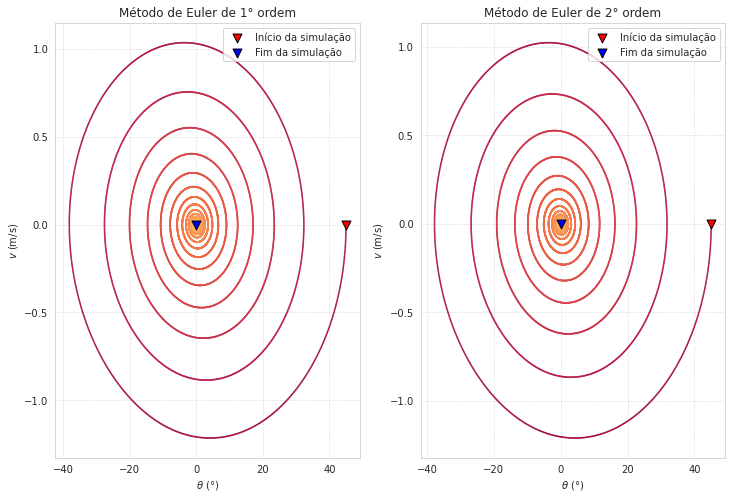

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# fixando um estilo que gosto
sns.set_style("whitegrid", {"grid.linestyle": ":"})

# gráfico da velocidade por theta
thetas = [thetas1, thetas2]
vs = [v1, v2]

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
for i in range(2):
    axs[i].scatter(thetas[i]*180/np.pi, vs[i], marker = ".", c = np.tan(np.linspace(-1, 1, len(thetas[i]))),
                cmap = sns.color_palette("Spectral", as_cmap=True), alpha = 0.8, s = 2)
    axs[i].scatter(thetas[i][0]*180/np.pi, vs[i][0], marker = "v", color = "red",
                label = "Início da simulação", s = 80, edgecolors = "black")
    axs[i].scatter(thetas[i][-1]*180/np.pi, vs[i][-1], marker = "v", color = "blue",
                label = "Fim da simulação", s = 80, edgecolors = "black")
    axs[i].set_title("Método de Euler de " + ["1° ordem", "2° ordem"][i])
    axs[i].set_xlabel(r"$\theta$ (°)")
    axs[i].set_ylabel(r"$v$ (m/s)")
    axs[i].legend(loc = "upper right")
plt.savefig('fig1.png', dpi = 600)
plt.show()

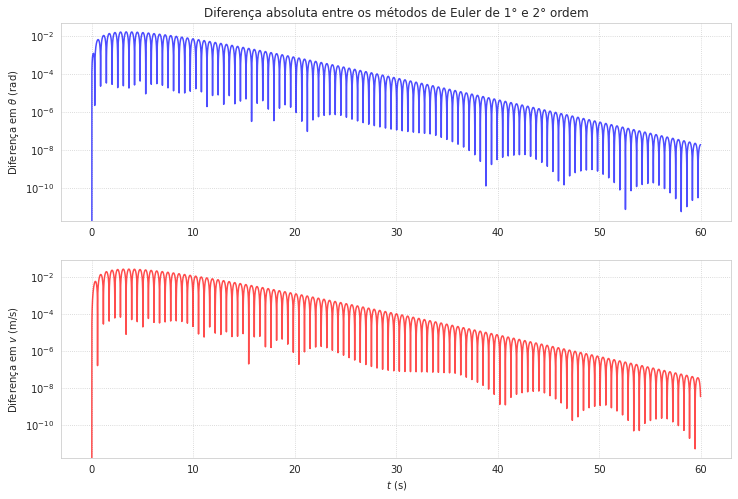

In [5]:
# calculando diferenças absolutas
ts = np.arange(0, deltat + 0.001, 0.001)
theta_diff = np.abs(thetas1 - thetas2)
vs_diff = np.abs(v1 - v2)

diff = [theta_diff, vs_diff]
fig, axs = plt.subplots(2, 1, figsize = (12, 8))
for i in range(2):    
    axs[i].plot(ts, diff[i], color = ["blue", "red"][i], alpha = 0.7)
    axs[i].set_ylabel([r"Diferença em $\theta$ (rad)",
                        r"Diferença em $v$ (m/s)"][i])
    axs[i].set_yscale("log")
axs[0].set_title("Diferença absoluta entre os métodos de Euler de 1° e 2° ordem")
axs[1].set_xlabel(r"$t$ (s)")
plt.savefig('fig2.png', dpi = 600)
plt.show()

Vemos que, neste primeiro caso, a discrepância, tanto em $\theta$ quanto em $v$, máxima entre os dois métodos de Euler é da ordem de $10^{-2}$, e depois decresce a medida que o pêndulo converge para o ângulo zero com velocidade nula.

**2° comparação: pêndulo forçado ($f_0 = 1$N e $w_0 = 2$Hz) e amortecido**

In [6]:
deltat = 60

# simulação para o método de Euler de primeira ordem
thetas1, phis1 = Euler1(45, 0, deltat, 0.001, 1, 2)
v1 = l*phis1

# simulação para o método de Euler de segunda ordem
thetas2, phis2 = Euler2(45, 0, deltat, 0.001, 1, 2)
v2 = l*phis2

Visualizando as diferenças:

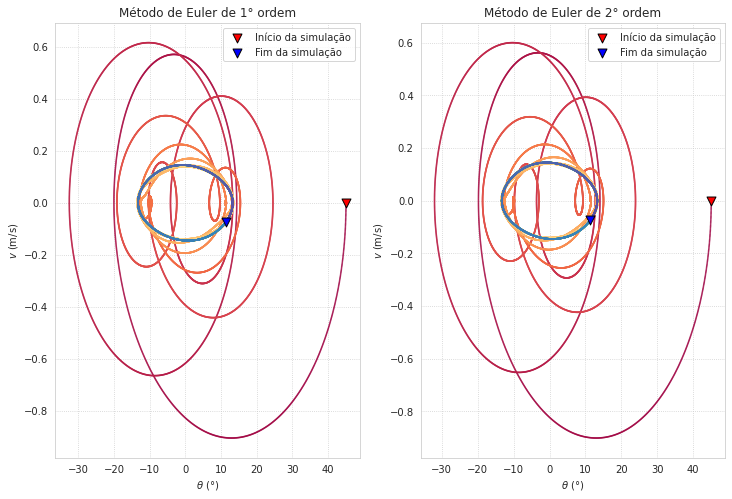

In [7]:
# gráfico da velocidade por theta
thetas = [thetas1, thetas2]
vs = [v1, v2]

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
for i in range(2):
    axs[i].scatter(thetas[i]*180/np.pi, vs[i], marker = ".", c = np.tan(np.linspace(-1, 1, len(thetas[i]))),
                cmap = sns.color_palette("Spectral", as_cmap=True), alpha = 0.8, s = 2)
    axs[i].scatter(thetas[i][0]*180/np.pi, vs[i][0], marker = "v", color = "red",
                label = "Início da simulação", s = 80, edgecolors = "black")
    axs[i].scatter(thetas[i][-1]*180/np.pi, vs[i][-1], marker = "v", color = "blue",
                label = "Fim da simulação", s = 80, edgecolors = "black")
    axs[i].set_title("Método de Euler de " + ["1° ordem", "2° ordem"][i])
    axs[i].set_xlabel(r"$\theta$ (°)")
    axs[i].set_ylabel(r"$v$ (m/s)")
    axs[i].legend(loc = "upper right")
plt.savefig('fig3.png', dpi = 600)
plt.show()

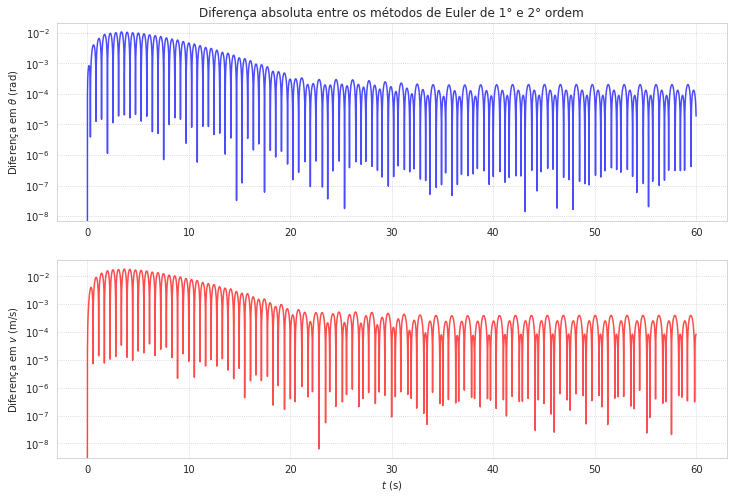

In [8]:
# calculando diferenças absolutas
ts = np.arange(0, deltat + 0.001, 0.001)
theta_diff = np.abs(thetas1 - thetas2)
vs_diff = np.abs(v1 - v2)

diff = [theta_diff, vs_diff]
fig, axs = plt.subplots(2, 1, figsize = (12, 8))
for i in range(2):    
    axs[i].plot(ts, diff[i], color = ["blue", "red"][i], alpha = 0.7)
    axs[i].set_ylabel([r"Diferença em $\theta$ (rad)",
                          r"Diferença em $v$ (m/s)"][i])
    axs[i].set_yscale("log")
axs[0].set_title("Diferença absoluta entre os métodos de Euler de 1° e 2° ordem")
axs[1].set_xlabel(r"$t$ (s)")
plt.savefig('fig4.png', dpi = 600)
plt.show()

Neste caso, a discrepância, tanto em $\theta$ quanto em $v$, possui um pico na ordem de $10^{-2}$ e depois estabiliza na ordem de $10^{-4}$.

**3° comparação: pêndulo forçado ($f_0 = 2$N e $w_0 = 2$Hz) e amortecido**

In [9]:
deltat = 60

# simulação para o método de Euler de primeira ordem
thetas1, phis1 = Euler1(45, 0, deltat, 0.001, 2, 2)
v1 = l*phis1

# simulação para o método de Euler de segunda ordem
thetas2, phis2 = Euler2(45, 0, deltat, 0.001, 2, 2)
v2 = l*phis2

Visualizando as diferenças:

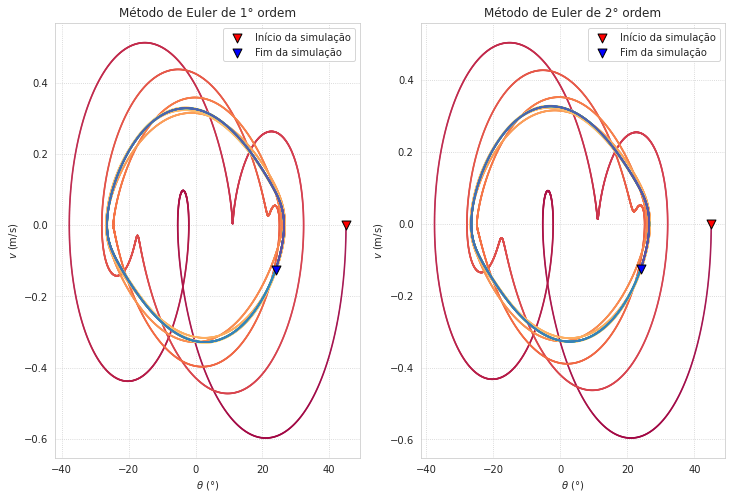

In [10]:
# gráfico da velocidade por theta
thetas = [thetas1, thetas2]
vs = [v1, v2]

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
for i in range(2):
    axs[i].scatter(thetas[i]*180/np.pi, vs[i], marker = ".", c = np.tan(np.linspace(-1, 1, len(thetas[i]))),
                cmap = sns.color_palette("Spectral", as_cmap=True), alpha = 0.8, s = 2)
    axs[i].scatter(thetas[i][0]*180/np.pi, vs[i][0], marker = "v", color = "red",
                label = "Início da simulação", s = 80, edgecolors = "black")
    axs[i].scatter(thetas[i][-1]*180/np.pi, vs[i][-1], marker = "v", color = "blue",
                label = "Fim da simulação", s = 80, edgecolors = "black")
    axs[i].set_title("Método de Euler de " + ["1° ordem", "2° ordem"][i])
    axs[i].set_xlabel(r"$\theta$ (°)")
    axs[i].set_ylabel(r"$v$ (m/s)")
    axs[i].legend(loc = "upper right")
plt.savefig('fig5.png', dpi = 600)
plt.show()

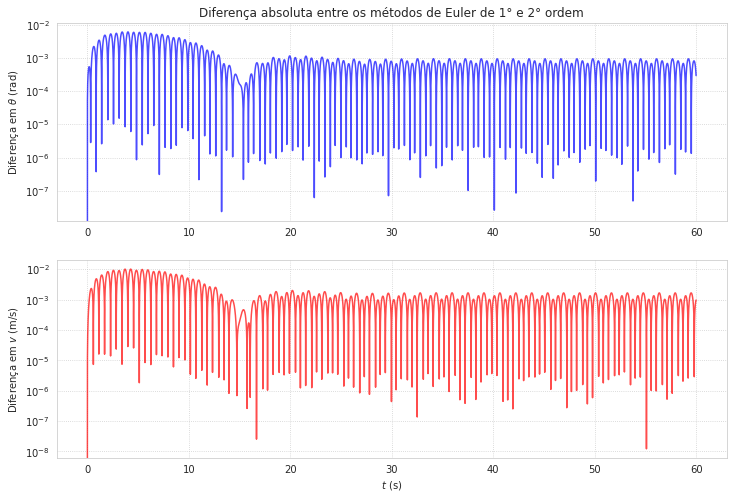

In [11]:
# calculando diferenças absolutas
ts = np.arange(0, deltat + 0.001, 0.001)
theta_diff = np.abs(thetas1 - thetas2)
vs_diff = np.abs(v1 - v2)

diff = [theta_diff, vs_diff]
fig, axs = plt.subplots(2, 1, figsize = (12, 8))
for i in range(2):    
    axs[i].plot(ts, diff[i], color = ["blue", "red"][i], alpha = 0.7)
    axs[i].set_ylabel([r"Diferença em $\theta$ (rad)",
                          r"Diferença em $v$ (m/s)"][i])
    axs[i].set_yscale("log")
axs[0].set_title("Diferença absoluta entre os métodos de Euler de 1° e 2° ordem")
axs[1].set_xlabel(r"$t$ (s)")
plt.savefig('fig6.png', dpi = 600)
plt.show()

Neste caso, a discrepância, tanto em $\theta$ quanto em $v$, apresentam um pico na ordem de $10^{-2}$ e depois estabiliza na ordem de $10^{-3}$.

**4° comparação: pêndulo forçado ($f_0 = 5$N e $w_0 = 2$Hz) e amortecido**

In [12]:
deltat = 60

# simulação para o método de Euler de primeira ordem
thetas1, phis1 = Euler1(45, 0, deltat, 0.001, 5, 2)
v1 = l*phis1

# simulação para o método de Euler de segunda ordem
thetas2, phis2 = Euler2(45, 0, deltat, 0.001, 5, 2)
v2 = l*phis2

Visualizando as diferenças:

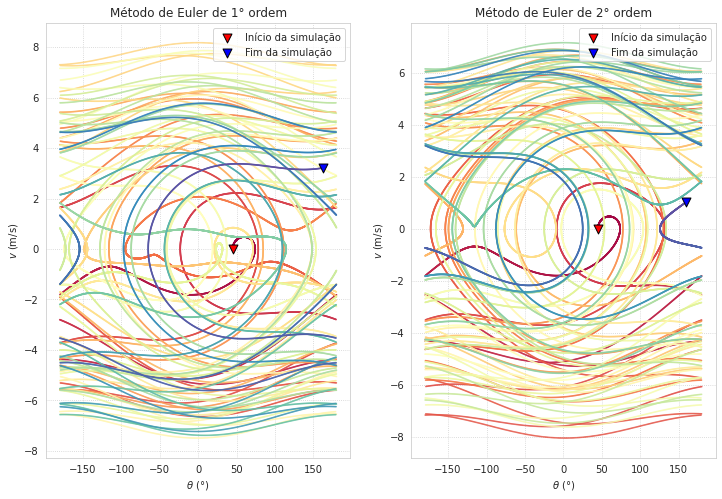

In [13]:
# gráfico da velocidade por theta
thetas = [thetas1, thetas2]
vs = [v1, v2]

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
for i in range(2):
    axs[i].scatter(thetas[i]*180/np.pi, vs[i], marker = ".", c = np.tan(np.linspace(-1, 1, len(thetas[i]))),
                cmap = sns.color_palette("Spectral", as_cmap=True), alpha = 0.8, s = 2)
    axs[i].scatter(thetas[i][0]*180/np.pi, vs[i][0], marker = "v", color = "red",
                label = "Início da simulação", s = 80, edgecolors = "black")
    axs[i].scatter(thetas[i][-1]*180/np.pi, vs[i][-1], marker = "v", color = "blue",
                label = "Fim da simulação", s = 80, edgecolors = "black")
    axs[i].set_title("Método de Euler de " + ["1° ordem", "2° ordem"][i])
    axs[i].set_xlabel(r"$\theta$ (°)")
    axs[i].set_ylabel(r"$v$ (m/s)")
    axs[i].legend(loc = "upper right")
plt.savefig('fig7.png', dpi = 600)
plt.show()

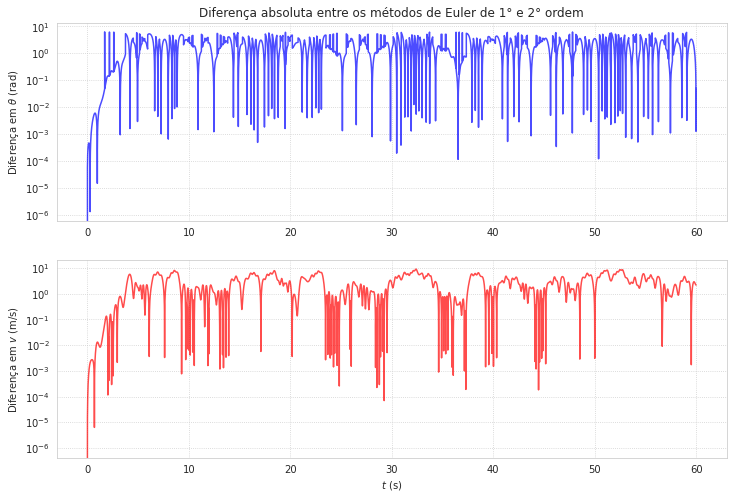

In [14]:
# calculando diferenças absolutas
ts = np.arange(0, deltat + 0.001, 0.001)
theta_diff = np.abs(thetas1 - thetas2)
vs_diff = np.abs(v1 - v2)

diff = [theta_diff, vs_diff]
fig, axs = plt.subplots(2, 1, figsize = (12, 8))
for i in range(2):    
    axs[i].plot(ts, diff[i], color = ["blue", "red"][i], alpha = 0.7)
    axs[i].set_ylabel([r"Diferença em $\theta$ (rad)",
                          r"Diferença em $v$ (m/s)"][i])
    axs[i].set_yscale("log")
axs[0].set_title("Diferença absoluta entre os métodos de Euler de 1° e 2° ordem")
axs[1].set_xlabel(r"$t$ (s)")
plt.savefig('fig8.png', dpi = 600)
plt.show()

Neste último caso onde a amplitude da força motriz é 5N, vemos que há uma discrepância grande no gráfico de $\theta$ por $v$ entre os dois métodos de Euler. Isso indica uma instabilidade na solução numérica das equações diferenciais para valores altos de $f_0$.

Nos gráficos que mostram a diferença absoluta entre os valores obtidos numericamente pelos dois métodos de Euler, as diferenças estabilizam na ordem de $10^{0}$, o que é bastante desagradável, pois, a partir de um determinado tempo (cerca de 5 segundos), não podemos confiar na solução obtida.

### **Explorando o comportamento do pêndulo para pequenas perturbações nas condições iniciais**

Por questões de simplicidade, os parâmetros que caracterizam a simulação serão os mesmos:

- A massa do elemento oscilante será 500g;

- A aceleração da gravidade será 9.80665$\frac{m}{s^2}$;

- O comprimento da haste do pêndulo será 30cm;

- E a constante de proporcionalidade da força de resistência será 0.3$\frac{Ns}{m}$;

Ademais, **a posição inicial será 45° enquanto que a velocidade será nula** (pêndulo em repouso), enquanto que as equações diferenciais serão resolvidas usando somente o método de Euler de 2° ordem.

**1°: Perturbações na posição inicial na ausência da força motriz**

In [15]:
deltat = 60

# theta = 45° e v0 = 0
thetas1, phis1 = Euler2(45, 0, deltat, 0.001, 0, 0)
v1 = l*phis1

# theta = 45.1° e v0 = 0
thetas2, phis2 = Euler2(45.1, 0, deltat, 0.001, 0, 0)
v2 = l*phis2

Visualizando o movimento do pêndulo nessas duas condições:

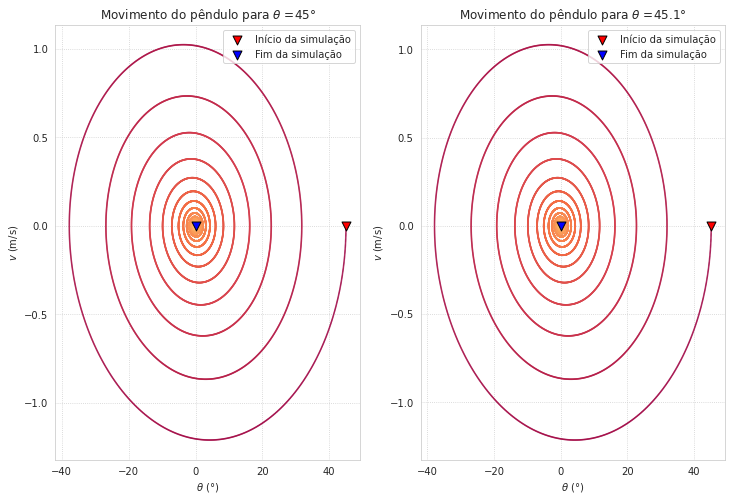

In [16]:
# gráfico da velocidade por theta
thetas = [thetas1, thetas2]
vs = [v1, v2]

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
for i in range(2):
    axs[i].scatter(thetas[i]*180/np.pi, vs[i], marker = ".", c = np.tan(np.linspace(-1, 1, len(thetas[i]))),
                cmap = sns.color_palette("Spectral", as_cmap=True), alpha = 0.8, s = 2)
    axs[i].scatter(thetas[i][0]*180/np.pi, vs[i][0], marker = "v", color = "red",
                label = "Início da simulação", s = 80, edgecolors = "black")
    axs[i].scatter(thetas[i][-1]*180/np.pi, vs[i][-1], marker = "v", color = "blue",
                label = "Fim da simulação", s = 80, edgecolors = "black")
    axs[i].set_title(r"Movimento do pêndulo para $\theta$ =" + ["45°", "45.1°"][i])
    axs[i].set_xlabel(r"$\theta$ (°)")
    axs[i].set_ylabel(r"$v$ (m/s)")
    axs[i].legend(loc = "upper right")
plt.savefig('fig9.png', dpi = 600)
plt.show()

Visualizando as diferenças absolutas nas soluções:

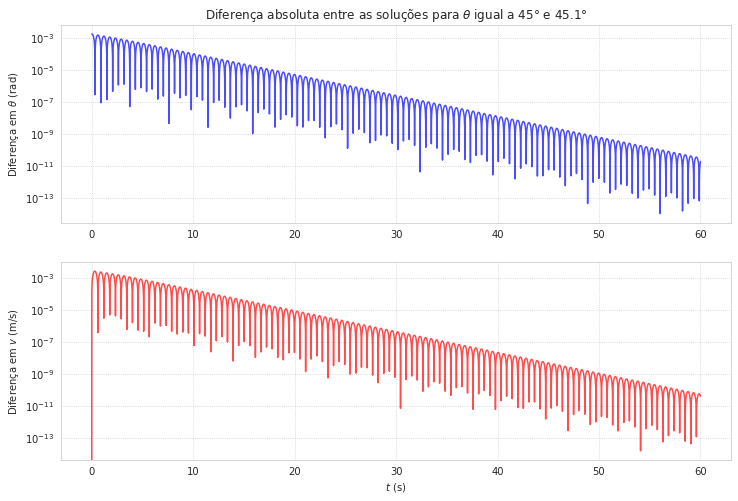

In [17]:
# calculando diferenças absolutas
ts = np.arange(0, deltat + 0.001, 0.001)
theta_diff = np.abs(thetas1 - thetas2)
vs_diff = np.abs(v1 - v2)

diff = [theta_diff, vs_diff]
fig, axs = plt.subplots(2, 1, figsize = (12, 8))
for i in range(2):    
    axs[i].plot(ts, diff[i], color = ["blue", "red"][i], alpha = 0.7)
    axs[i].set_ylabel([r"Diferença em $\theta$ (rad)",
                          r"Diferença em $v$ (m/s)"][i])
    axs[i].set_yscale("log")
axs[0].set_title(r"Diferença absoluta entre as soluções para $\theta$ igual a 45° e 45.1°")
axs[1].set_xlabel(r"$t$ (s)")
plt.savefig('fig10.png', dpi = 600)
plt.show()

**2°: perturbações na posição inicial para $f_0$ = 1N e $w_0$ = 2Hz**

In [18]:
deltat = 60

# theta = 45° e v0 = 0
thetas1, phis1 = Euler2(45, 0, deltat, 0.001, 1, 2)
v1 = l*phis1

# theta = 45.1° e v0 = 0
thetas2, phis2 = Euler2(45.1, 0, deltat, 0.001, 1, 2)
v2 = l*phis2

Visualizando o movimento do pêndulo nessas duas condições:

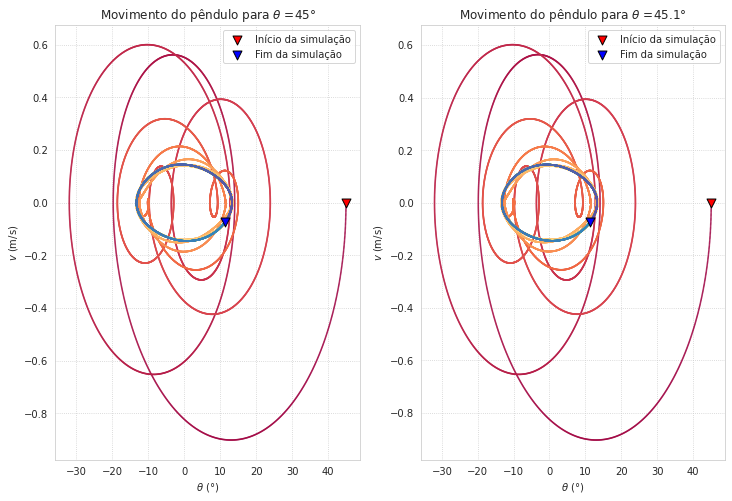

In [19]:
# gráfico da velocidade por theta
thetas = [thetas1, thetas2]
vs = [v1, v2]

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
for i in range(2):
    axs[i].scatter(thetas[i]*180/np.pi, vs[i], marker = ".", c = np.tan(np.linspace(-1, 1, len(thetas[i]))),
                cmap = sns.color_palette("Spectral", as_cmap=True), alpha = 0.8, s = 2)
    axs[i].scatter(thetas[i][0]*180/np.pi, vs[i][0], marker = "v", color = "red",
                label = "Início da simulação", s = 80, edgecolors = "black")
    axs[i].scatter(thetas[i][-1]*180/np.pi, vs[i][-1], marker = "v", color = "blue",
                label = "Fim da simulação", s = 80, edgecolors = "black")
    axs[i].set_title(r"Movimento do pêndulo para $\theta$ =" + ["45°", "45.1°"][i])
    axs[i].set_xlabel(r"$\theta$ (°)")
    axs[i].set_ylabel(r"$v$ (m/s)")
    axs[i].legend(loc = "upper right")
plt.savefig('fig11.png', dpi = 600)
plt.show()

Visualizando as diferenças absolutas nas soluções:

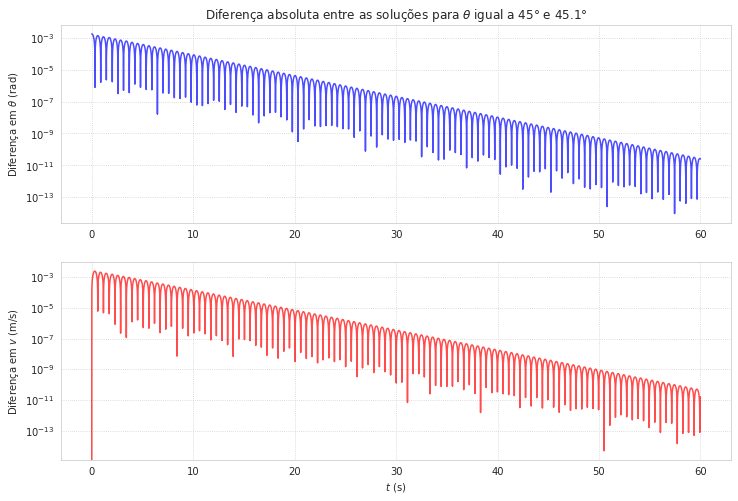

In [20]:
# calculando diferenças absolutas
ts = np.arange(0, deltat + 0.001, 0.001)
theta_diff = np.abs(thetas1 - thetas2)
vs_diff = np.abs(v1 - v2)

diff = [theta_diff, vs_diff]
fig, axs = plt.subplots(2, 1, figsize = (12, 8))
for i in range(2):    
    axs[i].plot(ts, diff[i], color = ["blue", "red"][i], alpha = 0.7)
    axs[i].set_ylabel([r"Diferença em $\theta$ (rad)",
                          r"Diferença em $v$ (m/s)"][i])
    axs[i].set_yscale("log")
axs[0].set_title(r"Diferença absoluta entre as soluções para $\theta$ igual a 45° e 45.1°")
axs[1].set_xlabel(r"$t$ (s)")
plt.savefig('fig12.png', dpi = 600)
plt.show()

**3°: perturbações na posição inicial para $f_0$ = 2N e $w_0$ = 2Hz**

In [21]:
deltat = 60

# theta = 45° e v0 = 0
thetas1, phis1 = Euler2(45, 0, deltat, 0.001, 2, 2)
v1 = l*phis1

# theta = 45.1° e v0 = 0
thetas2, phis2 = Euler2(45.1, 0, deltat, 0.001, 2, 2)
v2 = l*phis2

Visualizando o movimento do pêndulo para as duas condições:

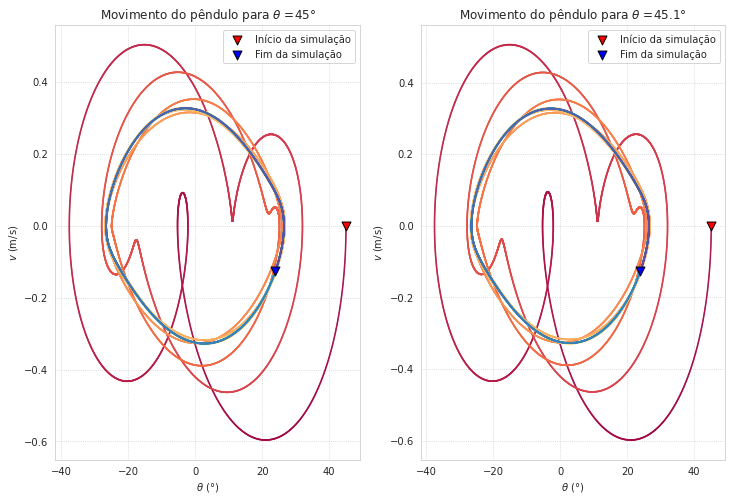

In [22]:
# gráfico da velocidade por theta
thetas = [thetas1, thetas2]
vs = [v1, v2]

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
for i in range(2):
    axs[i].scatter(thetas[i]*180/np.pi, vs[i], marker = ".", c = np.tan(np.linspace(-1, 1, len(thetas[i]))),
                cmap = sns.color_palette("Spectral", as_cmap=True), alpha = 0.8, s = 2)
    axs[i].scatter(thetas[i][0]*180/np.pi, vs[i][0], marker = "v", color = "red",
                label = "Início da simulação", s = 80, edgecolors = "black")
    axs[i].scatter(thetas[i][-1]*180/np.pi, vs[i][-1], marker = "v", color = "blue",
                label = "Fim da simulação", s = 80, edgecolors = "black")
    axs[i].set_title(r"Movimento do pêndulo para $\theta$ =" + ["45°", "45.1°"][i])
    axs[i].set_xlabel(r"$\theta$ (°)")
    axs[i].set_ylabel(r"$v$ (m/s)")
    axs[i].legend(loc = "upper right")
plt.savefig('fig13.png', dpi = 600)
plt.show()

Visualizando as diferenças absolutas nas soluções:

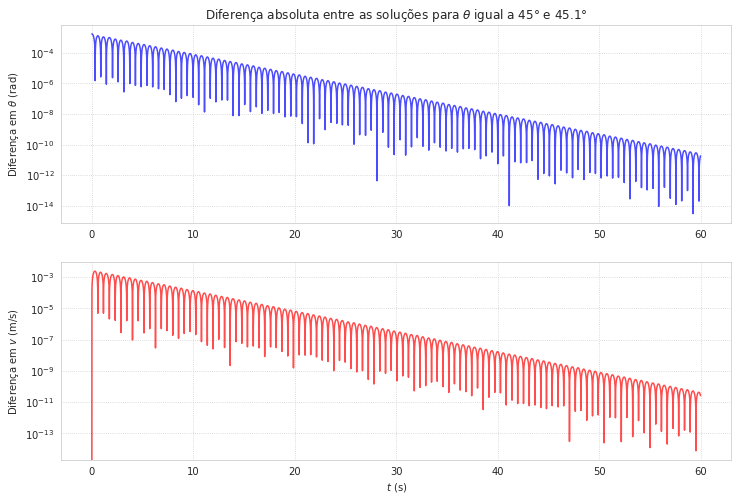

In [23]:
# calculando diferenças absolutas
ts = np.arange(0, deltat + 0.001, 0.001)
theta_diff = np.abs(thetas1 - thetas2)
vs_diff = np.abs(v1 - v2)

diff = [theta_diff, vs_diff]
fig, axs = plt.subplots(2, 1, figsize = (12, 8))
for i in range(2):    
    axs[i].plot(ts, diff[i], color = ["blue", "red"][i], alpha = 0.7)
    axs[i].set_ylabel([r"Diferença em $\theta$ (rad)",
                          r"Diferença em $v$ (m/s)"][i])
    axs[i].set_yscale("log")
axs[0].set_title(r"Diferença absoluta entre as soluções para $\theta$ igual a 45° e 45.1°")
axs[1].set_xlabel(r"$t$ (s)")
plt.savefig('fig14.png', dpi = 600)
plt.show()

**4°: perturbações na posição inicial para $f_0$ = 5N e $w_0$ = 2Hz**

In [24]:
deltat = 60

# theta = 45° e v0 = 0
thetas1, phis1 = Euler2(45, 0, deltat, 0.001, 5, 2)
v1 = l*phis1

# theta = 45.1° e v0 = 0
thetas2, phis2 = Euler2(45.1, 0, deltat, 0.001, 5, 2)
v2 = l*phis2

Visualizando o movimento do pêndulo para as duas condições:

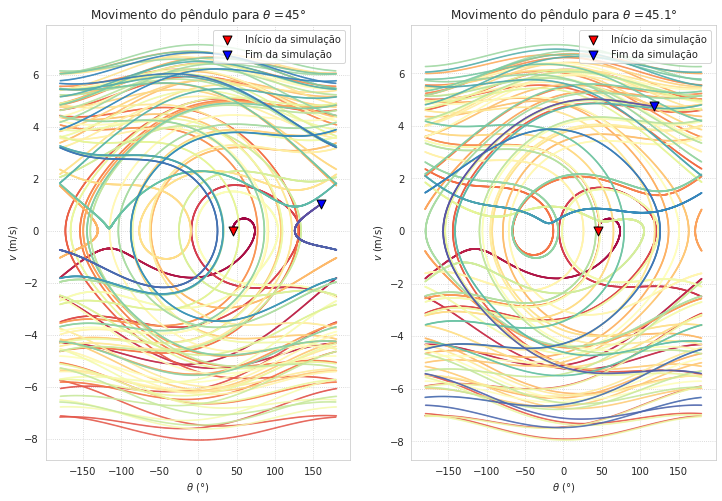

In [25]:
# gráfico da velocidade por theta
thetas = [thetas1, thetas2]
vs = [v1, v2]

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
for i in range(2):
    axs[i].scatter(thetas[i]*180/np.pi, vs[i], marker = ".", c = np.tan(np.linspace(-1, 1, len(thetas[i]))),
                cmap = sns.color_palette("Spectral", as_cmap=True), alpha = 0.8, s = 2)
    axs[i].scatter(thetas[i][0]*180/np.pi, vs[i][0], marker = "v", color = "red",
                label = "Início da simulação", s = 80, edgecolors = "black")
    axs[i].scatter(thetas[i][-1]*180/np.pi, vs[i][-1], marker = "v", color = "blue",
                label = "Fim da simulação", s = 80, edgecolors = "black")
    axs[i].set_title(r"Movimento do pêndulo para $\theta$ =" + ["45°", "45.1°"][i])
    axs[i].set_xlabel(r"$\theta$ (°)")
    axs[i].set_ylabel(r"$v$ (m/s)")
    axs[i].legend(loc = "upper right")
plt.savefig('fig15.png', dpi = 600)
plt.show()

Visualizando as diferenças absolutas nas soluções:

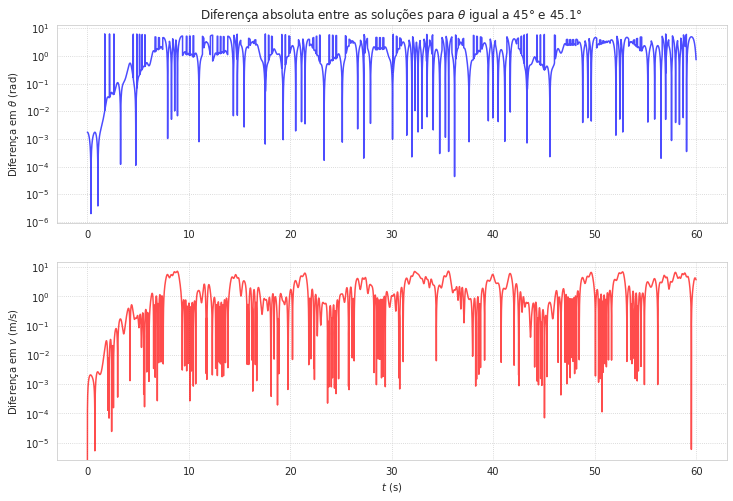

In [26]:
# calculando diferenças absolutas
ts = np.arange(0, deltat + 0.001, 0.001)
theta_diff = np.abs(thetas1 - thetas2)
vs_diff = np.abs(v1 - v2)

diff = [theta_diff, vs_diff]
fig, axs = plt.subplots(2, 1, figsize = (12, 8))
for i in range(2):    
    axs[i].plot(ts, diff[i], color = ["blue", "red"][i], alpha = 0.7)
    axs[i].set_ylabel([r"Diferença em $\theta$ (rad)",
                          r"Diferença em $v$ (m/s)"][i])
    axs[i].set_yscale("log")
axs[0].set_title(r"Diferença absoluta entre as soluções para $\theta$ igual a 45° e 45.1°")
axs[1].set_xlabel(r"$t$ (s)")
plt.savefig('fig16.png', dpi = 600)
plt.show()